In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import  LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [3]:
df=pd.read_csv("../data/df_clasi.csv")

## **MODELOS**

In [19]:
X=df[['Age', 'Height', 'Weight', 'family_with_overweight', 'Alcohol','Andar_bici','Control_kcal', 'FastFood',"Male"]]
y= df["BMI"]
#Para poder hacer la clasificación debemos tomar como target el BMI ya que es el rango
# que usamos para categorizar. De esta forma podremos predecir de un modo mucho mas preciso

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 score", model.score(X_test, y_test))
    print("R2 score train", model.score(X_train, y_train))
    print("MAE", mean_absolute_error(y_test, y_pred))
    print("MSE", mean_squared_error(y_test, y_pred))
    print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
    sns.displot(y_pred - y_test)
    return model

In [22]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

R2 score 0.9902139135403227
R2 score train 0.9905006739520524
MAE 0.5975386158017337
MSE 0.6464312554406806
RMSE 0.8040094871583796


LinearRegression()

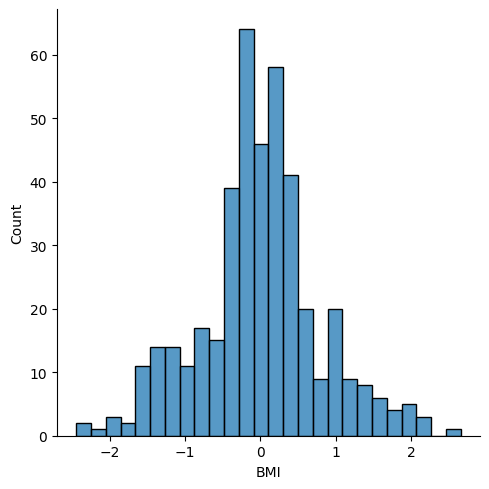

In [23]:
model_1 = train_evaluate_model(LinearRegression(), X_train_scal, y_train, X_test_scal, y_test)
model_1

R2 score 0.9902139135403228
R2 score train 0.9905006739520524
MAE 0.5975386158017404
MSE 0.6464312554406774
RMSE 0.8040094871583776


LinearRegression()

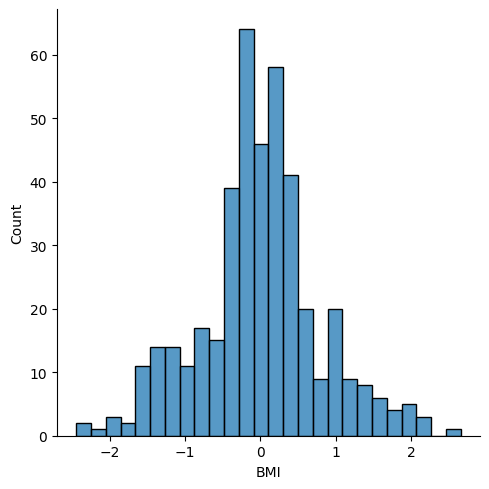

In [24]:
model_2 = train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)
model_2

R2 score 0.986761941247038
R2 score train 0.9868778270722159
MAE 0.7203350516969992
MSE 0.8744552763288164
RMSE 0.9351231343137739


Ridge(alpha=2)

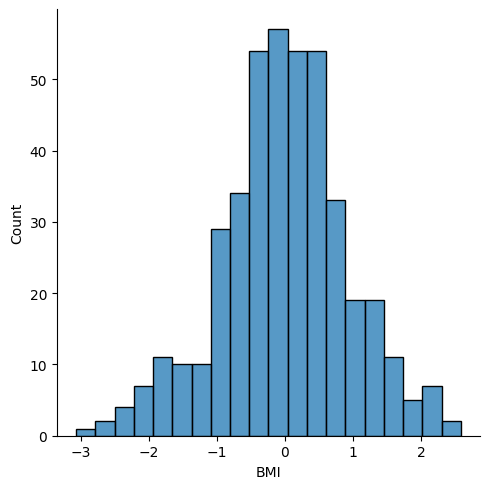

In [25]:
model_3 = train_evaluate_model(Ridge(alpha=2), X_train, y_train, X_test, y_test)
model_3

R2 score 0.9999344818561171
R2 score train 0.999934287134717
MAE 0.047236292542223154
MSE 0.004327876744077243
RMSE 0.06578660003433255


LinearRegression()

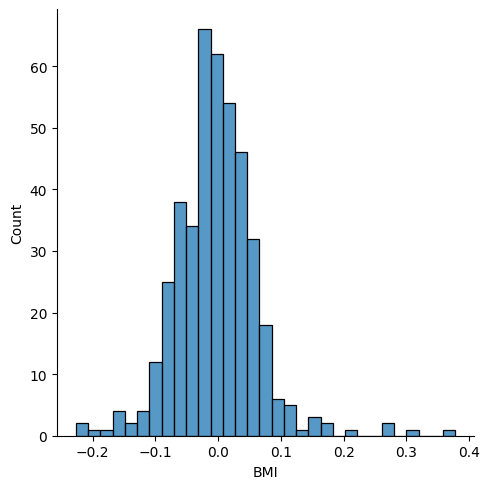

In [26]:
pol_2 = PolynomialFeatures(degree=2)

X_train_pol2 = pol_2.fit_transform(X_train)
X_test_pol2 = pol_2.transform(X_test)

model_4 = train_evaluate_model(LinearRegression(), X_train_pol2, y_train, X_test_pol2, y_test)
model_4

In [27]:
# Guardar el transformador PolynomialFeatures
with open("../modelos/pol2_transform_ob.pkl", "wb") as pol_transf_ob:
    pickle.dump(pol_2, pol_transf_ob)

In [28]:
with open("../modelos/pol2_ob.pkl", "wb") as model_pol2_ob:
    pickle.dump(model_4, model_pol2_ob)

R2 score 0.9863450040727236
R2 score train 0.990599829099778
MAE 0.6883870568636631
MSE 0.9019965434270042
RMSE 0.9497349858918561


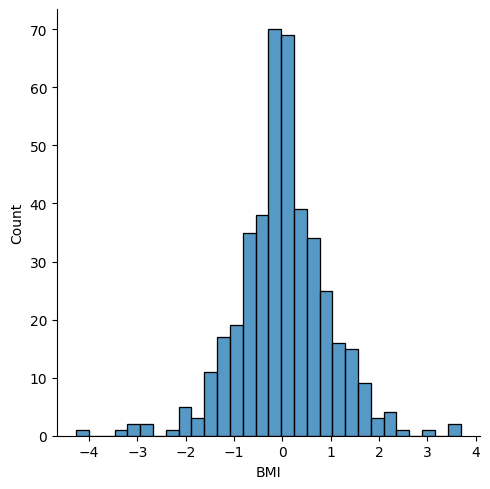

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg = RandomForestRegressor(n_estimators=200,
                                 max_leaf_nodes=32,
                                 random_state=42)
rnd_reg.fit(X_train, y_train)

y_pred_reg = rnd_reg.predict(X_test)
print("R2 score", rnd_reg.score(X_test, y_test))
print("R2 score train",rnd_reg.score(X_train, y_train))
print("MAE", mean_absolute_error(y_test, y_pred_reg))
print("MSE", mean_squared_error(y_test, y_pred_reg))
print("RMSE", mean_squared_error(y_test, y_pred_reg) ** (1/2))
sns.displot(y_pred_reg - y_test)

In [30]:
with open("../modelos/rnd_ob.pkl", "wb") as model_rnd_ob:
    pickle.dump(rnd_reg, model_rnd_ob)

Tenemos que tener en cuenta que el rengo entre una categoria y otra es de un 5%, por tanto el que parece mejor modelo es el polinomico, que nos da un Mae de 0.047%

### **MODELO REDES NEURONALES**

In [31]:
from tensorflow.keras.optimizers import RMSprop
from keras.utils import get_file
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
model_rn = keras.models.Sequential([
    keras.layers.Dense(64, activation = 'relu',
                      input_shape = X_train_scal.shape[1:]),# se esta definiendo la primera capa oculta(se autodefine),
                       # ya que no tiene funcion de activacion
    keras.layers.Dense(16),
    keras.layers.Dense(1)
])

model_rn.compile(loss = "mse",#funcion de perdida
             optimizer=tf.keras.optimizers.RMSprop(0.001),
             metrics=['mae'])



c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model_rn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,697 (6.63 KB)

 Trainable params: 1,697 (6.63 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [35]:
history = model_rn.fit(X_train_scal,
                   y_train,
                   batch_size=32,
                   epochs = 100,
                   validation_split=0.2,
                   callbacks=[early_stopping])# como ya hemos sacado el validation se lo pasamos

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 804.2498 - mae: 27.1770 - val_loss: 641.9374 - val_mae: 23.9141
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 514.7207 - mae: 21.0744 - val_loss: 295.6436 - val_mae: 15.4439
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 205.3056 - mae: 12.3869 - val_loss: 67.0247 - val_mae: 6.7597
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.2570 - mae: 5.6037 - val_loss: 21.4843 - val_mae: 3.7565
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 18.8759 - mae: 3.5161 - val_loss: 12.6762 - val_mae: 2.8145
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 10.8844 - mae: 2.6347 - val_loss: 9.0148 - val_mae: 2.2567
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.8189 - mae: 2.1759 - val_loss: 6.7293 - val_mae: 1.8993
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2482 - mae: 1.8593 - val_loss: 5.2944 - val_mae: 1.6497
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 

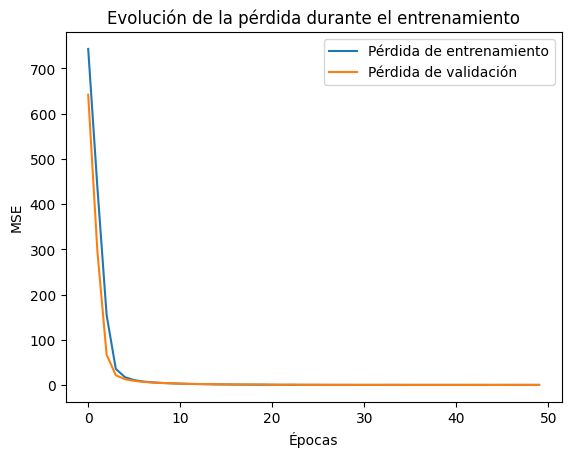

In [36]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()

In [37]:
y_pred=model_rn.predict(X_test_scal[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


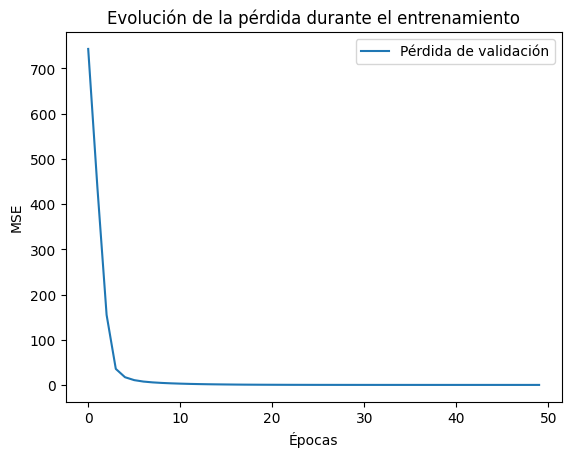

In [38]:
plt.plot(history.history['loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()

In [39]:
model_rn.compile(loss="mse", optimizer=RMSprop(learning_rate=0.001), metrics=["mae", "mse"])

loss,mae, mse = model_rn.evaluate(X_test_scal, y_test, verbose=1)

print(f"Pérdida (Loss - MSE): {loss:.4f}")
print(f"Error absoluto medio (MAE): {mae:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0951 - mae: 0.2025 - mse: 0.0951  
Pérdida (Loss - MSE): 0.0838
Error absoluto medio (MAE): 0.2041
Error cuadrático medio (MSE): 0.0838


In [40]:
model_rn.save("../modelos/model_keras_ob.h5")

---------------------------

Evaluamos los modelos

In [41]:
y_pred_rn = (model_rn.predict(X_test_scal)).flatten()#Lo pasamos a 1_dim


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [42]:
df_resultados_rn = pd.DataFrame({'Age':X_test["Age"], 'Height (m)':X_test['Height'],'Male':X_test['Male'],'Weight (kg)':X_test['Weight'],"BMI": y_pred_rn,"BMI real":y_test})

In [43]:
df_resultados_rn.head(10)

,Age,Height (m),Male,Weight (kg),BMI,BMI real
544,20,1.755978,0,53.699561,17.722160,17.415366
1987,26,1.624950,0,111.004920,41.831291,42.039953
420,18,1.850000,1,60.000000,17.578285,17.531045
527,21,1.520000,0,42.000000,18.645115,18.178670
196,22,1.750000,1,74.000000,24.075428,24.163265
744,18,1.738702,1,50.248677,16.685814,16.621657
1635,26,1.819535,1,118.332689,35.570988,35.742416
324,30,1.650000,0,71.000000,25.918318,26.078972
1449,23,1.571812,0,78.997166,31.998558,31.974982
634,23,1.710129,0,50.079991,17.212208,17.124050


In [44]:
X_ejer_pol2 = pol_2.transform(X_test)
y_pred_ejer_pol2 = np.round(model_4.predict(X_ejer_pol2),2)

In [45]:
df_resultados_pol2 = pd.DataFrame({"BMI": y_pred_ejer_pol2,"BMI real":y_test})

In [46]:
df_resultados_pol2.head(10)

,BMI,BMI real
544,17.38,17.415366
1987,41.97,42.039953
420,17.63,17.531045
527,18.36,18.178670
196,24.15,24.163265
744,16.53,16.621657
1635,35.74,35.742416
324,26.08,26.078972
1449,31.92,31.974982
634,17.05,17.124050


In [47]:
df_resultados_rnd = pd.DataFrame({"BMI": y_pred_reg,"BMI real":y_test})

In [48]:
df_resultados_rnd.head(10)

,BMI,BMI real
544,17.938399,17.415366
1987,41.290995,42.039953
420,18.000873,17.531045
527,17.884378,18.178670
196,23.771345,24.163265
744,16.852609,16.621657
1635,36.326561,35.742416
324,25.937654,26.078972
1449,32.169971,31.974982
634,17.410685,17.124050


**Evaluamos que modelo de los escogidos nos da mejores resultados en test**

In [49]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(df_resultados_rn["BMI real"], df_resultados_rn["BMI"])
mse = mean_squared_error(df_resultados_rn["BMI real"], df_resultados_rn["BMI"])
rmse = np.sqrt(mse)
r2 = r2_score(df_resultados_rn["BMI real"],df_resultados_rn["BMI"])

# Mostrar resultados
print(f"MAE_rnd: {mae:.2f} ")
print(f"RMSE_rnd: {rmse:.2f}")
print(f"R² Score_rnd: {r2:.2f}")

MAE_rnd: 0.20 
RMSE_rnd: 0.29
R² Score_rnd: 1.00


In [50]:
mae = mean_absolute_error(df_resultados_pol2["BMI real"], df_resultados_pol2["BMI"])
mse = mean_squared_error(df_resultados_pol2["BMI real"], df_resultados_pol2["BMI"])
rmse = np.sqrt(mse)
r2 = r2_score(df_resultados_pol2["BMI real"],df_resultados_pol2["BMI"])

# Mostrar resultados
print(f"MAE_pol2: {mae:.2f} ")
print(f"RMSE_pol2: {rmse:.2f} ")
print(f"R² Score_pol2: {r2:.2f}")

MAE_pol2: 0.05 
RMSE_pol2: 0.07 
R² Score_pol2: 1.00


In [51]:
mae = mean_absolute_error(df_resultados_rnd["BMI real"], df_resultados_rnd["BMI"])
mse = mean_squared_error(df_resultados_rnd["BMI real"], df_resultados_rnd["BMI"])
rmse = np.sqrt(mse)
r2 = r2_score(df_resultados_rnd["BMI real"],df_resultados_rnd["BMI"])

# Mostrar resultados
print(f"MAE_rnd: {mae:.2f} ")
print(f"RMSE_rnd: {rmse:.2f} ")
print(f"R² Score_rnd: {r2:.2f}")

MAE_rnd: 0.69 
RMSE_rnd: 0.95 
R² Score_rnd: 0.99


    De todos los modelos estudiados vemos que el que mejor resultados nos da es el de polinomio de grado 2

--------------------------------

----------------------------------